# Classification_Task_Flower_ Classification_manual_Split_DropOut

## Importing Data

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
Train_dataGen = ImageDataGenerator(rescale=1)
Test_dataGen =ImageDataGenerator(rescale=1)

## CNN Model

In [12]:
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dense,Dropout 
from keras.models import Sequential

In [13]:
model=Sequential()

In [14]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(5,activation='softmax'))

In [15]:
train_itt =Train_dataGen.flow_from_directory('D:\\DATA Science\\DEEP LEARNING\\CNN\Flower_Classification\\DataSet\\Flower_by_Split_folder\\train',
                                           batch_size=64,target_size=(100,100))

test_itt = Test_dataGen.flow_from_directory('D:\\DATA Science\\DEEP LEARNING\\CNN\Flower_Classification\\DataSet\\Flower_by_Split_folder\\test',
                                           batch_size=64,target_size=(100,100))

Found 3451 images belonging to 5 classes.
Found 498 images belonging to 5 classes.


In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.fit(train_itt,validation_data=test_itt,epochs=8)

Epoch 1/8
54/54 [==============================] - 96s 2s/step - loss: 53.5533 - accuracy: 0.2092 - val_loss: 1.6000 - val_accuracy: 0.2369
Epoch 2/8
54/54 [==============================] - 195s 4s/step - loss: 1.5925 - accuracy: 0.2394 - val_loss: 1.5974 - val_accuracy: 0.2209
Epoch 3/8
54/54 [==============================] - 172s 3s/step - loss: 1.5790 - accuracy: 0.2533 - val_loss: 1.5846 - val_accuracy: 0.2410
Epoch 4/8
54/54 [==============================] - 163s 3s/step - loss: 1.5620 - accuracy: 0.2593 - val_loss: 1.5965 - val_accuracy: 0.2269
Epoch 5/8
54/54 [==============================] - 177s 3s/step - loss: 1.5386 - accuracy: 0.2796 - val_loss: 1.6062 - val_accuracy: 0.2430
Epoch 6/8
54/54 [==============================] - 166s 3s/step - loss: 1.5319 - accuracy: 0.2727 - val_loss: 1.6004 - val_accuracy: 0.2430
Epoch 7/8
54/54 [==============================] - 172s 3s/step - loss: 1.5316 - accuracy: 0.2735 - val_loss: 1.6100 - val_accuracy: 0.2430
Epoch 8/8
54/54 [===

In [18]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

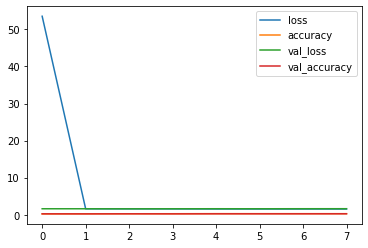

In [19]:
losses.plot()

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score

In [21]:
predictions = model.evaluate(test_itt)

8/8 [==============================] - 9s 924ms/step - loss: 1.6145 - accuracy: 0.2490


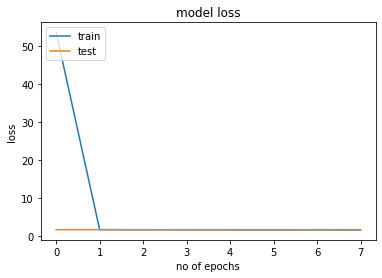

In [22]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

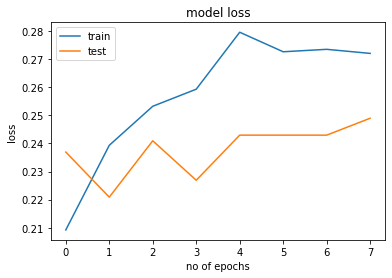

In [23]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [24]:
class_label= test_itt.class_indices
class_label

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}